In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import urllib.request  # download from url


In [2]:
print("Hi guys, feel free to add other usefull libraries! :D")

Hi guys, feel free to add other usefull libraries! :D


# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you.
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution
* Binning and plotting degree distributions.
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

# Part 2: Random networks and plotting in `networkx`

* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

In the first part, we are going to work with a Erdos-Renyi Network and calculate some of its properties. The network has 3000 nodes (N = 3000) which have a 0.001 probability of being connected to each other (p = 0.001).

**a) What is the expected number of links, 〈L〉?**

To calculate this, we apply the number of links formula 〈L〉 = (pN * (N-1))/2.

$ 〈L〉 = (0.001 * 3000 * (3000-1)) / 2 = 4498 $


**b) In which regime is the network?**

To know in which regime the network is, we have to calculate the average degree of the network.

$〈k〉 = p(N-1) = 0.001*(3000-1) = 2,99$

Because the average degree is bigger than 1, we can say it is in the supercritical regime.

**c) Calculate the probability  $p_c$  so that the network is at the critical point**

$p_c = 1/N-1 = 1 / 2999 = 0.00033344$

To demonstrate the correctness of the result, we calculate again the average degree using this probability,
$〈k〉 = p(N-1) = 0.00033344*(3000-1) = 1$

When the network is at critical point, the average degree is 1, so we can see that the result is correct.

**d) Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.**

To have one component, we need the graph to be in a connected regime, which is defined by the following rule:

$〈k〉 = ln(N^{cr})$

We also know that:

$〈k〉 = p*(N^{cr}-1)$

We substitute:

$ln(N^{cr}) = p*(N^{cr}-1)$

$ln(N^{cr}) = 0.001*(N^{cr}-1)$

If we solve the equation, we get that:

$N^{cr} = 9199$

**e) For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**

$〈k^{cr}〉 = p * (N^{cr} - 1)$

$〈k^{cr}〉 = 0.001 * (9119 - 1)$

$〈k^{cr}〉 = 9.118$



$〈d〉 = ln(N^{cr}) / ln(〈k^{cr}〉) = ln(9119)/ln(9.118) = 4.125$

**f) Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**

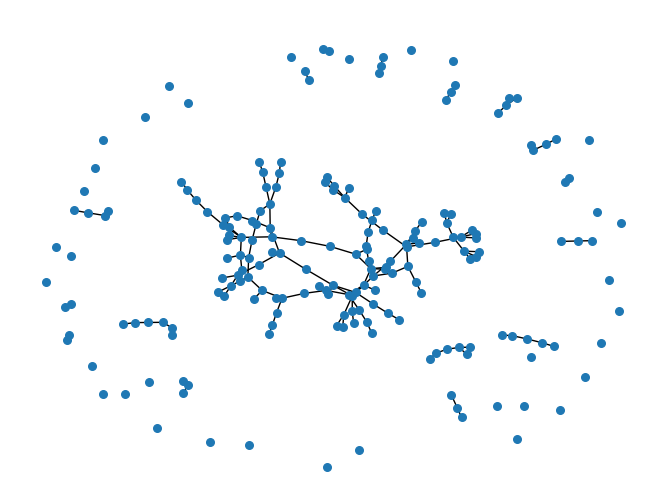

In [3]:
# Now we start with the part of the exercise that requires some code. The first thing we have to do is to create a random network with 200 nodes and an average degree of 1.5. We do this
# using the Networkx library and the function to generate Erdos-Renyi networks that it provides.

# The nx.erdos_renyi_graph function requires the probability that two nodes are connected to each other p. We get this value by resolving the equation 〈k〉 = p * (N-1)
# 1.5 = p * (200-1)
# p = 0.0075

G = nx.erdos_renyi_graph(200, 0.0075)
nx.draw(G, node_size=30)


**Figure A2.1**  <br>



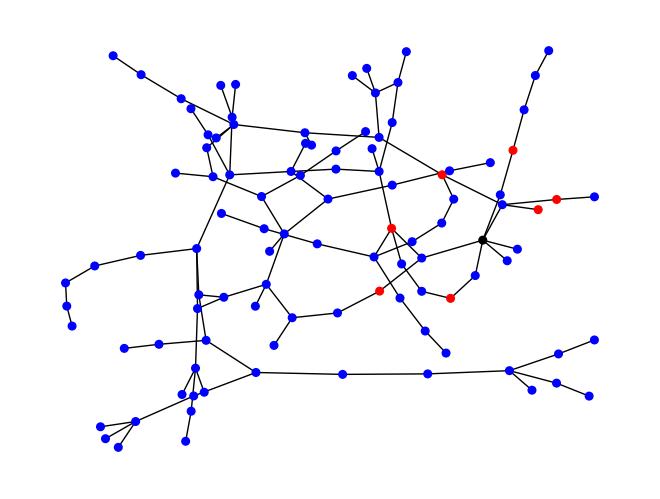

In [4]:
# Now we will keep using the methods provided by NetworkX to continue with the exercise. The first thing we have to do is get the biggest component of the graph. For that, we get all the components,
# and we retrieve the biggest one.

S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

max_value = 0
for graph in S:
  num_of_nodes = len(graph.nodes())
  if num_of_nodes > max_value:
    GCC = graph
    max_value = num_of_nodes

# Once we have it, we choose a random node using the random.choice method provided by Numpy

random_node = np.random.choice(GCC.nodes())

# Now we have to get the nodes that are at a distance of 2 from the random node we chose. Because the single_source_shortest_path_length function returns also the nodes that are a distance of 1 for example, we
# have to do some extra filtering afterwards to keep the ones that are at exactly 2 nodes of distance.
near_nodes = nx.single_source_shortest_path_length(GCC, random_node, 2)
near_nodes_numbers = []

for key, value in near_nodes.items():
    if value == 2:
        near_nodes_numbers.append(key)

# Before we plot the network, we have to construct the color map that we will use to paint the nodes. For that we iterate through all nodes and we check if it is a special node that should be colored and with what color.

color_map = []
for node in GCC:
    if node == random_node:
        color_map.append('black')
    elif node in near_nodes_numbers:
        color_map.append('red')
    else:
        color_map.append('blue')

# Now we are ready to plot!

nx.draw(GCC, node_color=color_map, pos=None, node_size=30)


**Figure A2.2**  <br>

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

The average shortest path is 62.875751503006015


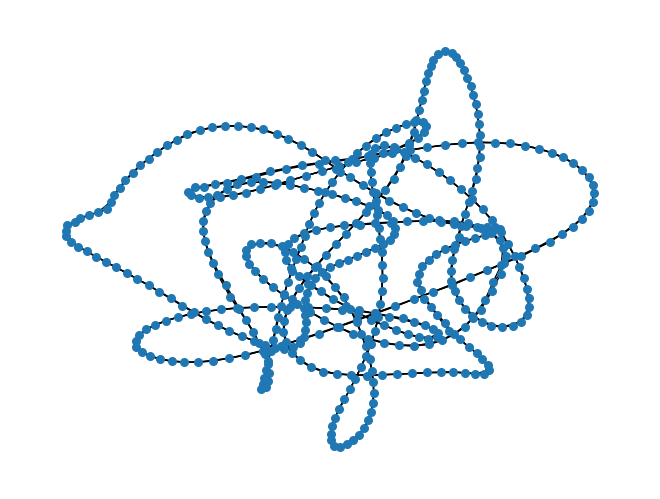

In [5]:
G = nx.watts_strogatz_graph(500, 4, 0)
nx.draw(G, pos=None, node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.1**  <br>

The average shortest path is 7.54887374749499


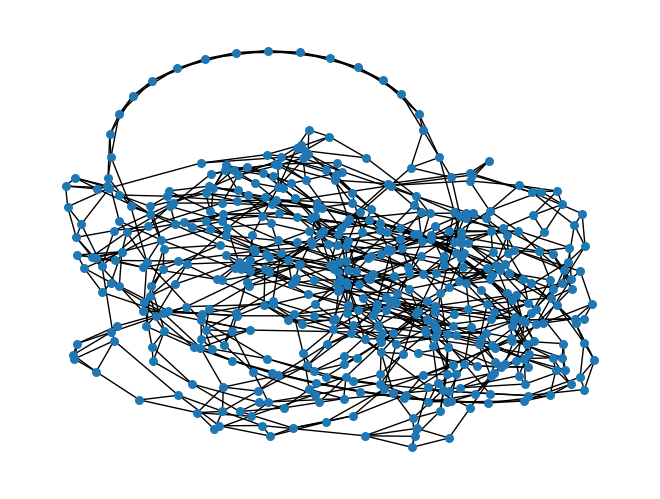

In [6]:
G = nx.watts_strogatz_graph(500, 4, 0.1)
nx.draw(G, pos=None, node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.2**  <br>

The average shortest path is 4.74551503006012


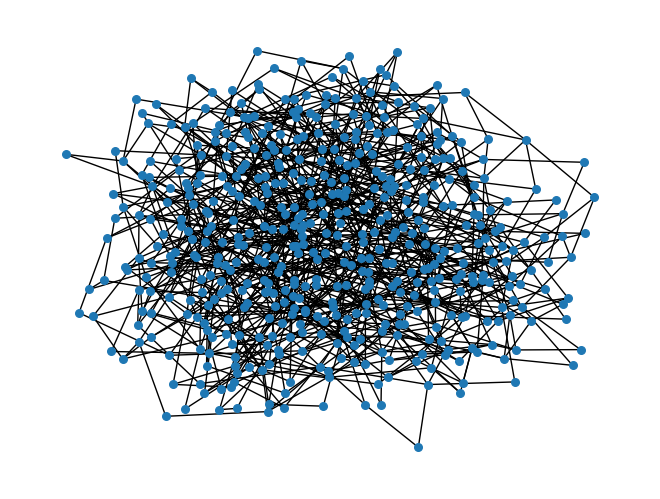

In [7]:
G = nx.watts_strogatz_graph(500, 4, 1)
nx.draw(G, pos=None, node_size=30)
print("The average shortest path is " + str(nx.average_shortest_path_length(G)))

**Figure A3.3**  <br>

Shortest path explanation and so on

In [8]:
p_vector = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
average_d_vector = []
std_d_vector = []

for p in p_vector:
    shortest_path_array = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        shortest_path_array.append(nx.average_shortest_path_length(G))
    average_d = np.mean(shortest_path_array)
    deviation_d = np.std(shortest_path_array)
    average_d_vector.append(average_d)
    std_d_vector.append(deviation_d)
    print("Graphs with p: " + str(p))
    print("Average shortest path: " + str(average_d))
    print("Standard deviation: " + str(deviation_d))
    print("")

Graphs with p: 0
Average shortest path: 62.87575150300602
Standard deviation: 7.105427357601002e-15

Graphs with p: 0.01
Average shortest path: 24.147859398797596
Standard deviation: 5.436639164296847

Graphs with p: 0.03
Average shortest path: 12.919970981963926
Standard deviation: 1.3203478533396484

Graphs with p: 0.05
Average shortest path: 10.09456
Standard deviation: 0.6395111242618475

Graphs with p: 0.1
Average shortest path: 7.699971142284569
Standard deviation: 0.2996828581854806

Graphs with p: 0.2
Average shortest path: 6.085885370741483
Standard deviation: 0.15372717058964586



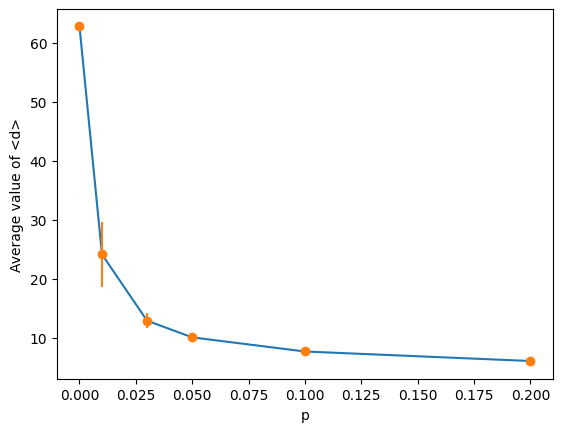

In [9]:
plt.plot(p_vector, average_d_vector)
plt.errorbar(p_vector, average_d_vector, yerr=std_d_vector, fmt='o')

plt.xlabel("p")
plt.ylabel("Average value of <d>")

#suggestion add the range in the way to see in a more clear way
# where the max start
#plt.yticks(np.arange(0, 80, 10))

plt.show()

**Figure A3.4**  <br>

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

### Week 3 Barabasi-Albert model function

In [10]:
# function that flatten a list of tuples in a single list
def flatten_edgelist(graph):
    return list(sum(graph.edges, ()))


def B_Albert_model(n=100):
    """n= number o desired nodes"""

    g=nx.Graph()            # initialize graph
    g.add_nodes_from([1,2]) # add nodes (Not necessary,as edges add also not existing nodes, but it's more clear)
    g.add_edge(1,2)         # add edges

    for i in range(3,n+1):                # add nodes to reach 100-(desiderated number of nodes)
        edge_list = flatten_edgelist(g)   # list of all edges of graph g (=pairers of nodes)

        pick = random.choice(edge_list)   # pick a random node from the list

        g.add_edge(i, pick)                #add edge between the new node and the picked one

    print("G number of nodes: ", g.number_of_nodes())  # check if the number of nodes is correct
    return g                                            # return the graph


 Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [11]:
G_a_100 = B_Albert_model(100)  # graph created

G number of nodes:  100


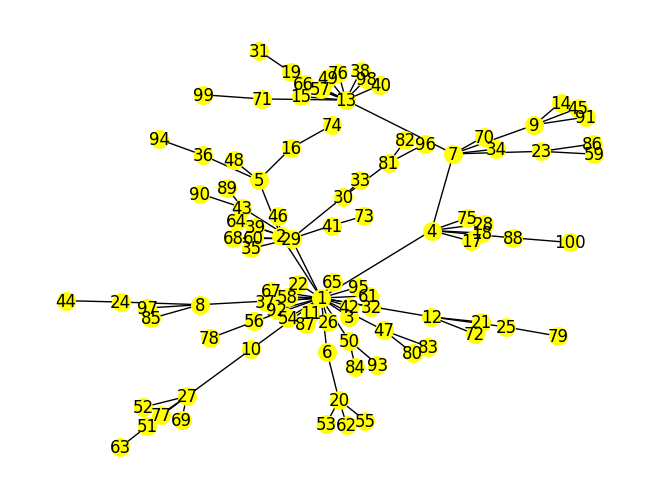

In [12]:
nx.draw(G_a_100, with_labels=True, node_color="yellow", node_size=160)  #plot

**Figure A4.1** <br>
Visual representation of the graph.

From the figure it could be noticed how the nodes 1 and 2 are hubs and one of the two is one of the biggest hub of the entire network. This depends from the construction of the Barabasi-Albert model, which attach new nodes with a higher probability to nodes with higher degree (=more connections; "hubs")

* Now create a 5000 node network.
  * What's the maximum and minimum degree?  (see below)
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

In [13]:
G_a_5000 = B_Albert_model(5000)  # graph created

G number of nodes:  5000


To plot the distributions and calculate max min degree.

Create 2 functions that:  
* create a list with all the degree of the graph  
* calculate the occurencies for each degree (this cold be done with np.histogram too)


In [14]:
# list of the degrees in the network

def k_lista(graph):
    start_node = min(graph.nodes)  # start node of the network

    k_dict= graph.degree()      # dictionary of degrees in the network  ( node_i: degree node_i)
    k_list =[ k_dict[k] for k in range( start_node ,len(k_dict)+start_node)]  # list of degrees in the network
    #print("k_dict: ", k_dict ,"\n", len(k_dict))  #to check if some doubts
    #print("k_list: ", k_list,"\n", len(k_list))
    return k_list



# calculate the frequence of each degree in the network
def occurencies(list="list of degrees"):
    occurencies = {}   #initalize a dict
    for i in list:
        occurencies[i] = occurencies.get(i, 0) + 1   #get: if i in dict[i]= value;
                                                     #     if not  dict[i] = 0
    return occurencies     # retunr occurencied dict = {degree_1 : freq_1 , degree_2 :freq_2 ...}


In [15]:
# max, min degree in the network
list_degree_a5000= k_lista(G_a_5000)

max_degree_a5000 = max(list_degree_a5000)
min_degree_a5000 = min(list_degree_a5000)
print("max_degree: ", max_degree_a5000,"\n" ,"min_degree: ", min_degree_a5000)


max_degree:  173 
 min_degree:  1


### Distibution plot

In [16]:
# store degrees k and their occurencies in lists
list_degree_a5000    # list of degrees
k = occurencies(list_degree_a5000 ).keys()   # extract key(=degree) from occurency dict (function defined above)
freq = occurencies(list_degree_a5000 ).values()  # extract occurencies of degree


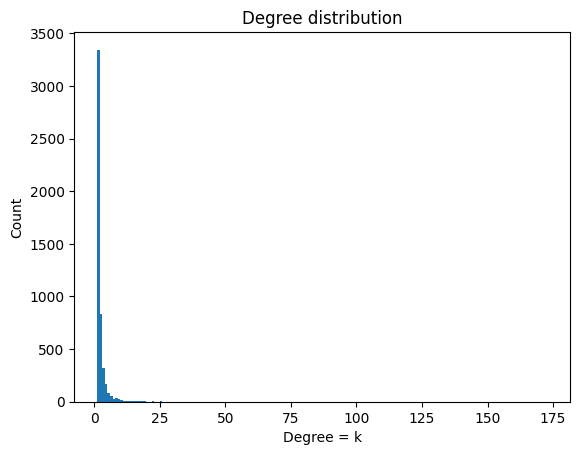

It could be noticed that in the hist plot some degree could not be seen as their count ~1 are not visible in 10^3 scale. I.e.: k= 173


In [17]:
#histogram occurencies of degree
wide = range(min(list_degree_a5000), max(list_degree_a5000)+1)
plt.hist(list_degree_a5000, bins=max_degree_a5000)   # np.histogram could be also used and pass the results to plot it
#KK, FF =np.histogram(list_degree_a5000 ,bins= max_degree_a5000, normed=None, weights=None, density=None)

plt.title("Degree distribution")
plt.xlabel("Degree = k")
plt.ylabel("Count")
plt.show()

print( "It could be noticed that in the hist plot some degree could not be seen as their count ~1 are not visible in 10^3 scale. I.e.: k=",np.max(np.array(list_degree_a5000) ) )



**Figure A4.2** <br>
Degree distribution histogram of the Barabasi-Albert network.

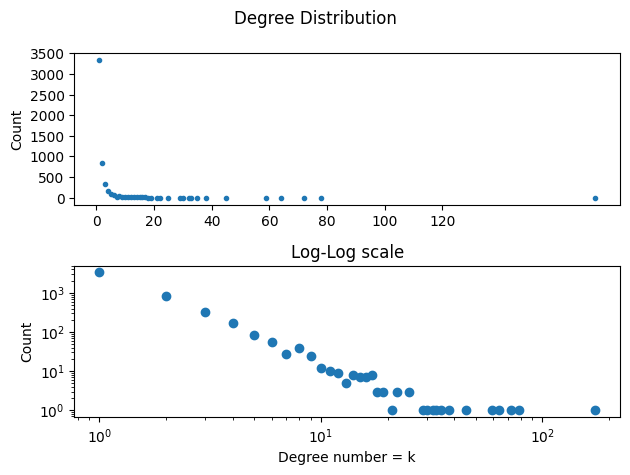

In [18]:
# 2 sublot
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Degree Distribution')


ax1.plot(k, freq, ".")
#ax1.set_xlabel('k')
ax1.set_ylabel('Count')
ax2.set_title("linear scale ")
ax1.set_xticks(np.arange(0, 130, 20))
ax1.set_yticks(np.arange(0, 4000, 500))

ax2.plot(k, freq, 'o')
ax2.set_xlabel('Degree number = k')
ax2.set_ylabel('Count')
ax2.set_title('Log-Log scale')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()

**Figure A4.3**  <br>
*In* the figure above the distibution of the degrees (degree vs degree count), and the distibution of the degree in a Log_log scale of the created Graph (5000 nodes, Barbaresi-Albert model) is shown.

* In the first plot it could be noticed a stringly non-inear behavior, that enhance the fact that very few nodes have a relly high degree (connections), and an extreme amount of nodes (~3500) have only one link. This behaviour is strictly linked to the model construction that enhance new nodes to connect with nodes with already higher degree.

* In the second Log-Log plot it could be noticed how the strong non-lineaar behavior which characterize the first plot in the range (0< K <15 ), becomes almost linear in a Logaritmich scale (power-law propriety).

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

# Part 6 Configuration-model networks

 Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [19]:
# Already created in es before

#G_a_100 = B_Albert_model(100)  # graph created in es 4
G_a_100_degree_list= k_lista(G_a_100)  # list of degrees in the network

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [20]:
def configuration_model (degrees) :

    halfedges = [] # a list of halfedges

    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    ####################################################################
    # in this for cicle some errors with big arrays occurs!!!
    for i, k in enumerate(degrees):
        halfedges.extend([i]*k)
        #print(halfedges)
        #break
    # STEP ONE ENDS HERE
    #print("Check if the following ouput matches what you expect 'halfedges' to look like")
    #print(halfedges)
    print("lennn1",len(halfedges))
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    np.random.shuffle(halfedges)
    ###print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print("lennn2",len(halfedges))
    # STEP TWO ENDS HERE
    # Append the resulting edges to the list `edgelist` as tuples
    # [that is, append (i,j) if i and j should be connected by and edge]
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.
    # STEP THREE GOES HERE..

    cicle=0
    #for j ,l  in enumerate(halfedges, 2):
    for j in range(0, len(halfedges), 2):
            l= halfedges[j]
            edgelist.append((l, halfedges[j+1]))
    # STEP THREE ENDS HERE
    #  print("Check if the following ouput matches what you expect 'edgelist' to look like", len(edgelist)) # here with a lot of nodes some errors occur!!!
    return edgelist #Return list of tuples indicating edges


* Extract the degree sequence for the 100-node Barabasi-Albermt network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).

In [21]:
degree= G_a_100_degree_list  # list of degrees in the 100-node Barabasi-Albermt network created before
#degree= [2,2,3,3]
G_configuration= configuration_model(degree)


lennn1 198
lennn2 198


* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?



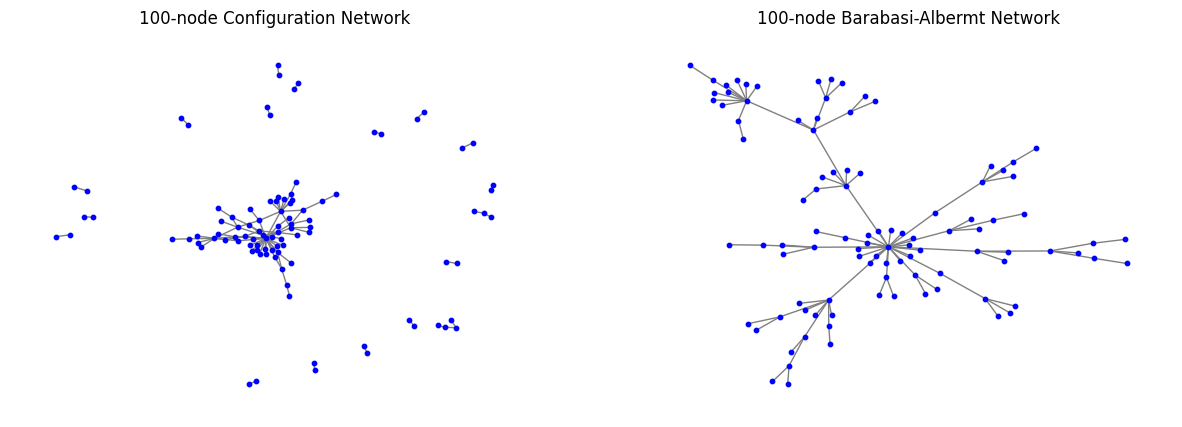

In [22]:
# subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot the 100-node Barabasi-Albermt network
nx.draw(G_a_100, ax=ax2, node_size=10, node_color="blue", edge_color="grey", with_labels=False)
ax2.set_title("100-node Barabasi-Albermt Network")

# plot the 100-node configuration network
G_configuration = nx.Graph(G_configuration)
nx.draw(G_configuration, ax=ax1, node_size=10, node_color="blue", edge_color="grey", with_labels=False)
ax1.set_title("100-node Configuration Network")
plt.tight_layout
plt.show()


**Figure A6.1**  <br>
The two networks are different because the configuration model is a random network, so the edges are randomly distributed, while the Barabasi-Albert model is a scale-free network who follows a power-law distibution(as seen before). This means that the Barabasi-Albert model has a few nodes with a high degree and many nodes with a low degree; in addition it is a fully connected graph without self_connections by consruction.

A more complex implementation of the Configuration network function could be used in an effort to reduce the number of self loops (by giving priority to the other connections).
In addition, it has to be rememebered hat some (degree - node) configurations, couldn't be implemented. (I.e. the most straightforward scenario with 2 nodes with 3 and 2 connections. Or the well-known "Königsberg Problem".)

From a mathematical point of view to have a fully connected graph  only the start and/or end node could have an odd number of links. In other words, some configurations could be done simply by creating more not connected hubs; others could simply  not be performed (I.e. All cases in which the sum of degrees is an odd number).

### Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [23]:
list_5000_3_4 =[3,5]*2500
G_configuration_5000= configuration_model(list_5000_3_4)
G_configuration_5000_nx = nx.Graph(G_configuration_5000)

lennn1 20000
lennn2 20000


* What should the sum of node degrees be if all nodes had degrees as described in the exercise?


In [24]:
# sum of all the degree passed at the configuration network construction fucntion
sum_5000_3_4 = sum(list_5000_3_4)# sum of all the degree input
print("Sum of degree passed at the configuartion network construction function: ", int(sum_5000_3_4) ,"\n")



Sum of degree passed at the configuartion network construction function:  20000 



* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [25]:
degree_G_configuration_5000= k_lista(G_configuration_5000_nx)  # list of degrees in the network
print("Sum of degree of the constructed configuration network: ",sum(degree_G_configuration_5000) ,"\n")
print("Number of nodes of the constructed configuration network: ", len(degree_G_configuration_5000) ,". This show that there are not missing nodes.","\n")

Sum of degree of the constructed configuration network:  19992 

Number of nodes of the constructed configuration network:  5000 . This show that there are not missing nodes. 



As it could be noticed the input degree sum is different from the output seen in the created configuration network.
Let's analyse it but printing a list of the degree of the created network.

In [26]:
# degree_G_configuration_5000 list of degrees in the network
k_conf=occurencies(degree_G_configuration_5000).keys()   # degree
freq_conf=occurencies(degree_G_configuration_5000).values()  # occurencies of degree\
print(len(degree_G_configuration_5000))
print("Degree in the created config: ", k_conf, "\n", "Count per degree: ", freq_conf)


5000
Degree in the created config:  dict_keys([3, 5, 4, 2]) 
 Count per degree:  dict_values([2499, 2493, 7, 1])


From the prints above it could be seen that nodes with unexpected degrees values (4 and 2) are present in the constructed network.

Let's plot it !

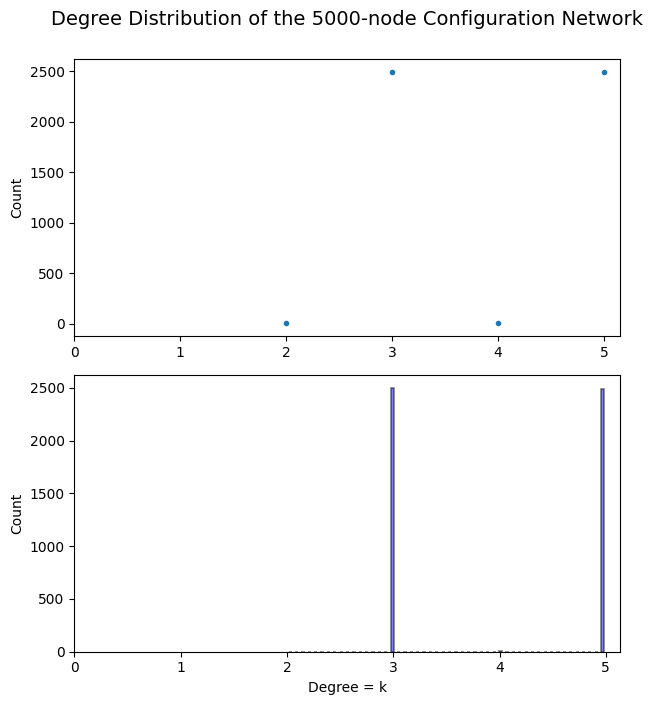

In [27]:
# 2 sublot
fig, (ax1, ax2) = plt.subplots(2,1)  # 2 rows, 1 column
fig.suptitle('Degree Distribution of the 5000-node Configuration Network' , fontsize=14 , y=1.0, x=0.55, ha="center")
# change dimension of the plot
fig.set_figheight(7)  # size of the plot
ax1.plot(k_conf, freq_conf, ".")
ax1.set_ylabel('Count')
ax1.set_xticks(np.arange(0, 6, 1))
ax2.hist(degree_G_configuration_5000, bins=50, color="blue", edgecolor="black", linewidth=1.2, alpha=0.5, rwidth=0.5 )
ax2.set_ylabel('Count')
ax2.set_xlabel('Degree = k')
ax2.set_xticks(np.arange(0, 6, 1))
plt.tight_layout()

**Figure A6.2**  <br>
The figure above shows the degree distribution of the 5000-node configuration network.
Two plots are reported to enhace the visualization as in the histogram due to scale issues some information concerning degree with count ~ $10^0$ would be lost.

# COULD NOT UNDERTAND WHY THE DEGREE SUM IS NOT AS EXPECTED !!!
Rounding Errors in the conversion from degree sequence to graph nx ??

***LET'S DISCUSS IT TOGETHER***


## tring to understand how loop connections are considered in degree graph (section not needed)

In [28]:
#degreee= G_a_100_degree_list  # list of degrees in the 100-node Barabasi-Albermt network created before
ww= [3,1,2]
G_configuration__1= configuration_model(ww)
G_configuration__1_nx = nx.Graph(G_configuration__1)



lennn1 6
lennn2 6


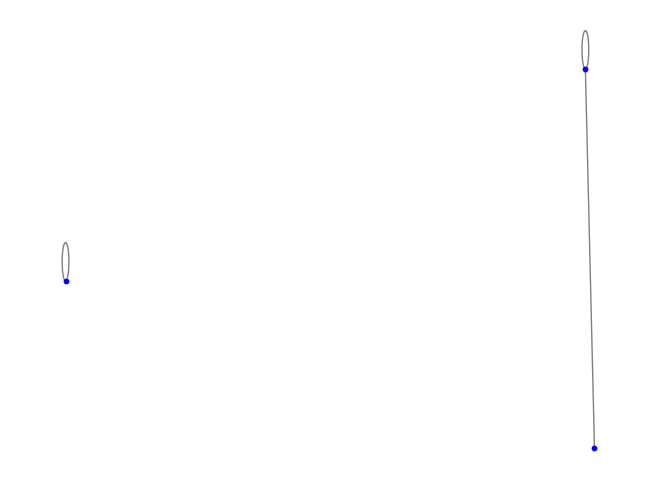

In [29]:
nx.draw(G_configuration__1_nx,  node_size=10, node_color="blue", edge_color="grey", with_labels=False)